In [27]:
# Carlos W. Mercado, CS241, Spring Semester 
# Week 12, Prove 12b Milestone - Data Analysis

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

players = pd.read_csv('basketball_players.csv')

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
'''
01
Calculate the mean and median number of points scored. (In other words, each row is the amount of points a player scored during a particular season.
Calculate the median of these values. The result of this is that we have the median number of points players score each season.)
'''
mean = players['points'].mean()

In [3]:
mean

492.1306892341375

In [4]:
median = players['points'].median()

In [5]:
median

329.0

In [6]:
'''
02
Determine the highest number of points recorded in a single season. Identify who scored those points and the year they did so.
'''
max_points = players['points'].max()

In [7]:
max_points

4029

In [8]:
master = pd.read_csv('basketball_master.csv')

In [10]:
nba = pd.merge(players, master, how='left', left_on='playerID', right_on='bioID')

In [14]:
nba.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'GP', 'GS', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'PostGP', 'PostGS',
       'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds',
       'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks',
       'PostTurnovers', 'PostPF', 'PostfgAttempted', 'PostfgMade',
       'PostftAttempted', 'PostftMade', 'PostthreeAttempted', 'PostthreeMade',
       'note', 'bioID', 'useFirst', 'firstName', 'middleName', 'lastName',
       'nameGiven', 'fullGivenName', 'nameSuffix', 'nameNick', 'pos',
       'firstseason', 'lastseason', 'height', 'weight', 'college',
       'collegeOther', 'birthDate', 'birthCity', 'birthState', 'birthCountry',
       'highSchool', 'hsCity', 'hsState', 'hsCountry', 'deathDate', 'race'],
      dtype='object')

In [16]:
player_max = nba.points == max_points

In [17]:
chamb = nba[player_max]

In [18]:
chamb

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
2078,chambwi01,1961,1,PHW,NBA,80,0,3882,4029,0,...,1936-08-21,Philadelphia,PA,USA,Overbrook,Philadelphia,PA,USA,1999-10-12,B


In [19]:
nba.columns

Index(['playerID', 'year', 'stint', 'tmID', 'lgID', 'GP', 'GS', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'PostGP', 'PostGS',
       'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds',
       'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks',
       'PostTurnovers', 'PostPF', 'PostfgAttempted', 'PostfgMade',
       'PostftAttempted', 'PostftMade', 'PostthreeAttempted', 'PostthreeMade',
       'note', 'bioID', 'useFirst', 'firstName', 'middleName', 'lastName',
       'nameGiven', 'fullGivenName', 'nameSuffix', 'nameNick', 'pos',
       'firstseason', 'lastseason', 'height', 'weight', 'college',
       'collegeOther', 'birthDate', 'birthCity', 'birthState', 'birthCountry',
       'highSchool', 'hsCity', 'hsState', 'hsCountry', 'deathDate', 'race'],
      dtype='object')

In [20]:
selected_data = chamb[['points', 'year', 'firstName', 'middleName', 'lastName']]

In [21]:
selected_data

,points,year,firstName,middleName,lastName
2078,4029,1961,Wilton,Norman,Chamberlain


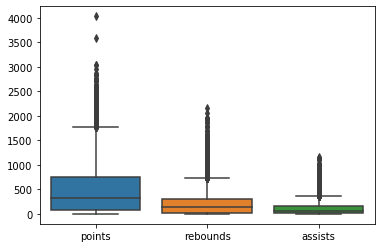

In [22]:
'''
03
Produce a boxplot that shows the distribution of total points, total assists,
and total rebounds (each of these three is a separate box plot, but they can be
on the same scale and in the same graphic).
'''
sns.boxplot(data=nba[['points', 'rebounds', 'assists']])

In [23]:
'''
04
Produce a plot that shows how the number of points scored has changed over time by showing the median of points scored per year,
over time. The x-axis is the year and the y-axis is the median number of points among all players for that year.
'''
median_points_per_year = nba[['points', 'year']].groupby('year').median()

In [28]:
median_points_per_year = median_points_per_year.reset_index()

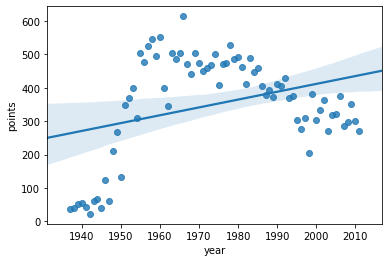

In [26]:
sns.regplot(data=median_points_per_year, x='year', y='points')